### 의사결정나무(DT)
- IF-ELES 방식의 질문에 대한 답변으로 문제를 해결하는 알고리즘
- 피처(특성) 중에서 선택한 기준으로 데이터 분할
    * 엔트로피 (불순정도) => 낮아지는 방향
    * 정보이득 : 1 - 엔트로피 => 높아지는 방향
    * 지니계수 : 불평등지수값 => 낮아지는 방향
- 장점 : 전처리 영향을 받지 않음, 직관성이 높음, 피처들 중 주요 피처 확인 가능
- 단점 : 과대적합이 될 가능성 높음! 성능이 좋지 않음
- 주의
    * 주요 피처란 적절한 데이터 분할을 위한 피처
    * 100% 데이터의 주요 피처 아닐 수 다른 검사(상관계수, 시각화 등등)와 함께 평가

[1]  모듈 로딩 및 데이터 준비 <hr>

In [65]:
# 모듈 로딩
import pandas as pd

In [66]:
# 데이터 준비
irisDF = pd.read_csv('../DATA/iris.csv')

[2] 학습용 데이터 준비 <hr>

[2-1] 피처와 타겟 분리

In [67]:
featureDF = irisDF[irisDF.columns[:4]]
targetSR = irisDF[irisDF.columns[4]]

In [68]:
featureDF.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

[2-2] 훈련용 테스트용 데이터셋 분리

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size = 0.2, stratify = targetSR)

[3] 기계학습 진행 <hr>
 - 타겟 데이터 확인 결과 : 3개의 분류
 - 학습 유형 : 지도학습 + 분류
    * 분류 알고리즘 => KNN, LogisticRegression, SVM, DecisionTree

[3-1] 의사결정 알고리즘으로 분류

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
# 인스턴스 생성
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [73]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [74]:
# 생성된 모델 구조 시각화
from sklearn.tree import export_graphviz

In [75]:
# DT 모델의 시각화 정보를 dot언어로 작성해서 파일로 저장
export_graphviz(model, 'iris_dt_model.dot',
                feature_names = list(irisDF.columns[:-1]),
                class_names = model.classes_,
                filled = True,
                rounded = True)

#### 아나콘다에 GraphViz 설치
- conda env list ===> 가상환경 리스트 확인
- conda activate EXAM_MML(가상환경 이름)
- python ===> 파이썬 명령어 사용 가능
- pip install GraphViz ===> GraphViz 설치

In [76]:
import graphviz as gz

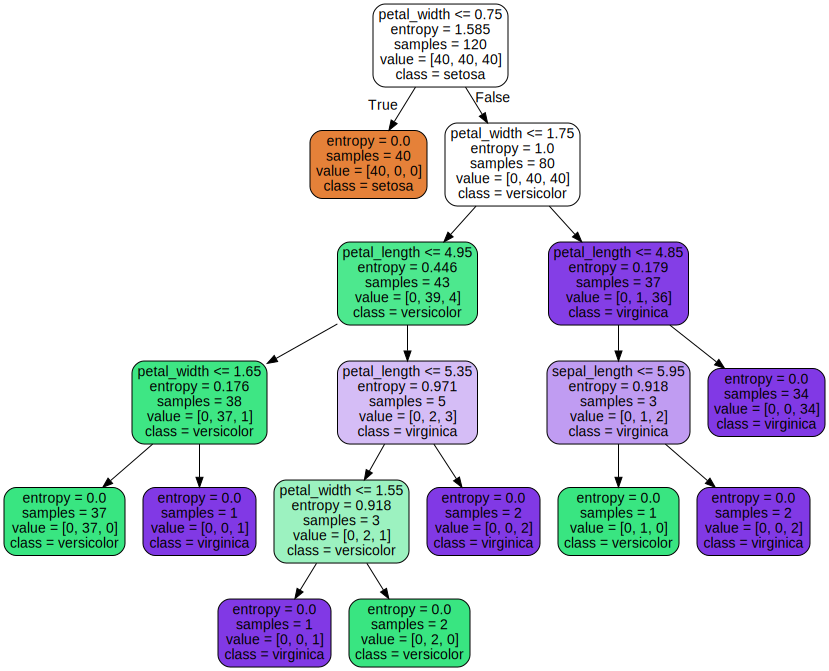

In [77]:
gz.Source.from_file('./iris_dt_model.dot')

[4] 모델평가 <hr>

In [78]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'Train Score => {train_score}\n\nTest Score => {test_score}')

Train Score => 1.0

Test Score => 1.0


[5] 문제 해결 및 성능 향상 즉, 튜닝 <hr>
- 원인 예상
    * 데이터셋 부족 => cv
    * DT의 여러가지 하이퍼파라미터 기본값으로만 사용 => 다양한 값 조절
- 해결 방법
    * 2개의 원인을 한꺼번에 해결하기 위해서 GridSearchCV

In [79]:
# 모듈 로딩
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [80]:
# 모델 조합 조건
# cv => 기본 5, max_depth, ..

dt_model = DecisionTreeClassifier()
n_cv = 5
params = {'criterion' : ['gini', 'entropy', 'log_loss'],
          'max_depth' : [5, 10, 15],
          'min_samples_split' : [2, 4, 6]}

# 하이퍼파라미터 조합된 모델 생성 후 교차검증 데이터셋으로 학습
# 진행해주는 인스턴스
gs = GridSearchCV(dt_model, param_grid = params, cv = n_cv)

In [81]:
# 조합된 모델들의 학습 진행
result = gs.fit(X_train, y_train)

In [82]:
# 결과 확인
result

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 4, 6]})

In [83]:
gs.cv_results_

{'mean_fit_time': array([0.00145941, 0.00152655, 0.00060463, 0.00077834, 0.        ,
        0.00100713, 0.00222449, 0.00015397, 0.        , 0.        ,
        0.        , 0.        , 0.00311928, 0.        , 0.00301385,
        0.00259395, 0.00101051, 0.00152984, 0.00112987, 0.00161653,
        0.00073423, 0.0015451 , 0.00060029, 0.00191393, 0.00083981,
        0.00020094, 0.00081463]),
 'std_fit_time': array([4.36208599e-04, 2.04867085e-03, 4.93737167e-04, 7.24901652e-04,
        0.00000000e+00, 1.56284320e-03, 3.46048047e-03, 3.07941437e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.23855591e-03, 0.00000000e+00, 6.02769852e-03, 4.71536368e-03,
        1.36308720e-05, 3.05967331e-03, 2.67344909e-04, 3.23305130e-03,
        3.88657580e-04, 3.09019089e-03, 4.90135309e-04, 3.82785797e-03,
        4.24086235e-04, 4.01878357e-04, 4.08011905e-04]),
 'mean_score_time': array([4.51517105e-04, 5.23853302e-04, 2.15673447e-04, 1.63893700e-03,
        0.00

In [84]:
# 학습 후 저장된 모델 파라미터 확인
# 교차학습 결과 => 조합된 모델의 개수만큼 결과 출력
cv_resultDF = pd.DataFrame(gs.cv_results_)

In [85]:
cv_resultDF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001459,0.000436,0.000452,0.000469,gini,5,2,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",1.000000,0.916667,1.000000,0.833333,0.916667,0.933333,0.062361,4
1,0.001527,0.002049,0.000524,0.000445,gini,5,4,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.958333,0.916667,0.958333,0.875000,0.916667,0.925000,0.031180,8
2,0.000605,0.000494,0.000216,0.000393,gini,5,6,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",1.000000,0.916667,0.958333,0.916667,0.916667,0.941667,0.033333,1
3,0.000778,0.000725,0.001639,0.002967,gini,10,2,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",1.000000,0.916667,1.000000,0.791667,0.916667,0.925000,0.076376,8
4,0.000000,0.000000,0.000000,0.000000,gini,10,4,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.958333,0.916667,0.958333,0.875000,0.916667,0.925000,0.031180,8
5,0.001007,0.001563,0.002789,0.005093,gini,10,6,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.958333,0.916667,0.958333,0.916667,0.916667,0.933333,0.020412,4
6,0.002224,0.003460,0.000471,0.000586,gini,15,2,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",1.000000,0.916667,1.000000,0.875000,0.916667,0.941667,0.050000,1
7,0.000154,0.000308,0.000000,0.000000,gini,15,4,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.958333,0.916667,0.958333,0.875000,0.916667,0.925000,0.031180,8
8,0.000000,0.000000,0.000000,0.000000,gini,15,6,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",1.000000,0.916667,0.958333,0.916667,0.916667,0.941667,0.033333,1
9,0.000000,0.000000,0.000000,0.000000,entropy,5,2,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.958333,0.916667,0.916667,0.958333,0.916667,0.933333,0.020412,4


In [86]:
# 조합된 모델 중 최고의 성능을 내는 하이퍼파라미터 값
gs.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 6}

In [87]:
# 조합된 모델 중 최고의 성능을 내는 모델 인스턴스
my_best_model = gs.best_estimator_

In [88]:
# 조합된 모델 중 최고 점수
gs.best_score_

0.9416666666666667

[6] 학습 및 튜닝 후 모델 저장 <hr>
- 다른 파일에서 활용이 가능한 형태로 저장
- 웹/앱 등 원하는 곳에서 활용 가능
- scikit-learn에서는 pikcle 포맷으로 저장
- joblib 모듈에 해당 기능 포함되어 있음

In [89]:
import joblib
import os

In [90]:
# 모델 저장
model_dir = '../model/'
model_filename = model_dir + 'iris_dt.pkl'

# 저장 폴더 존재 여부 확인 후 저장
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [91]:
joblib.dump(my_best_model, model_filename)

['../model/iris_dt.pkl']